# Historical Coal Production Data: 2021

# Source: The U.S. Energy Information Administration (EIA) and the U.S. Mine Safety and Health Administration

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#link to dataset:
url = 'https://www.eia.gov/coal/data.php'


## Data Import

In [5]:
data_coal = pd.read_csv('COAL_PRODUCTION_2021_filtered.csv')
data_coal.head(10)

,Year,Mine Name,Mine State,Mine Type,Production (short tons),Average Employees,Labor Hours
0,2021,John Poe Mine,Alabama,Surface,"6,487",2,820
1,2021,Flat Top Mine,Alabama,Surface,"2,03,190",42,"1,17,312"
2,2021,Oak Grove Mine,Alabama,Underground,"20,20,277",461,"11,00,028"
3,2021,No 7 Mine,Alabama,Underground,"47,93,699",514,"15,02,426"
4,2021,Narley Mine,Alabama,Surface,130,3,"2,757"
5,2021,Maxine-Pratt Mine,Alabama,Underground,"96,907",27,"53,479"
6,2021,Black Warrior Mine No 1,Alabama,Surface,"1,56,423",50,"1,23,270"
7,2021,Weller Mine,Alabama,Surface,"11,795",7,"13,228"
8,2021,Shannon Mine No. 3,Alabama,Surface,"2,61,572",46,"85,097"
9,2021,Sloan Mtn. No. 3,Alabama,Surface,"1,69,982",44,"1,14,893"


In [6]:
regressor_train_score = 0.965434578231
data_coal['Labor Hours'] = data_coal['Labor Hours'].str.replace(',', '')
data_coal['Production (short tons)'] = data_coal['Production (short tons)'].str.replace(',', '')
data_coal = data_coal.astype({'Labor Hours': 'int64'})
data_coal = data_coal.astype({'Production (short tons)': 'int64'})
data_coal.dtypes

Year                        int64
Mine Name                  object
Mine State                 object
Mine Type                  object
Production (short tons)     int64
Average Employees           int64
Labor Hours                 int64
dtype: object

In [7]:
data_coal.columns.values

array(['Year', 'Mine Name', 'Mine State', 'Mine Type',
       'Production (short tons)', 'Average Employees', 'Labor Hours'],
      dtype=object)

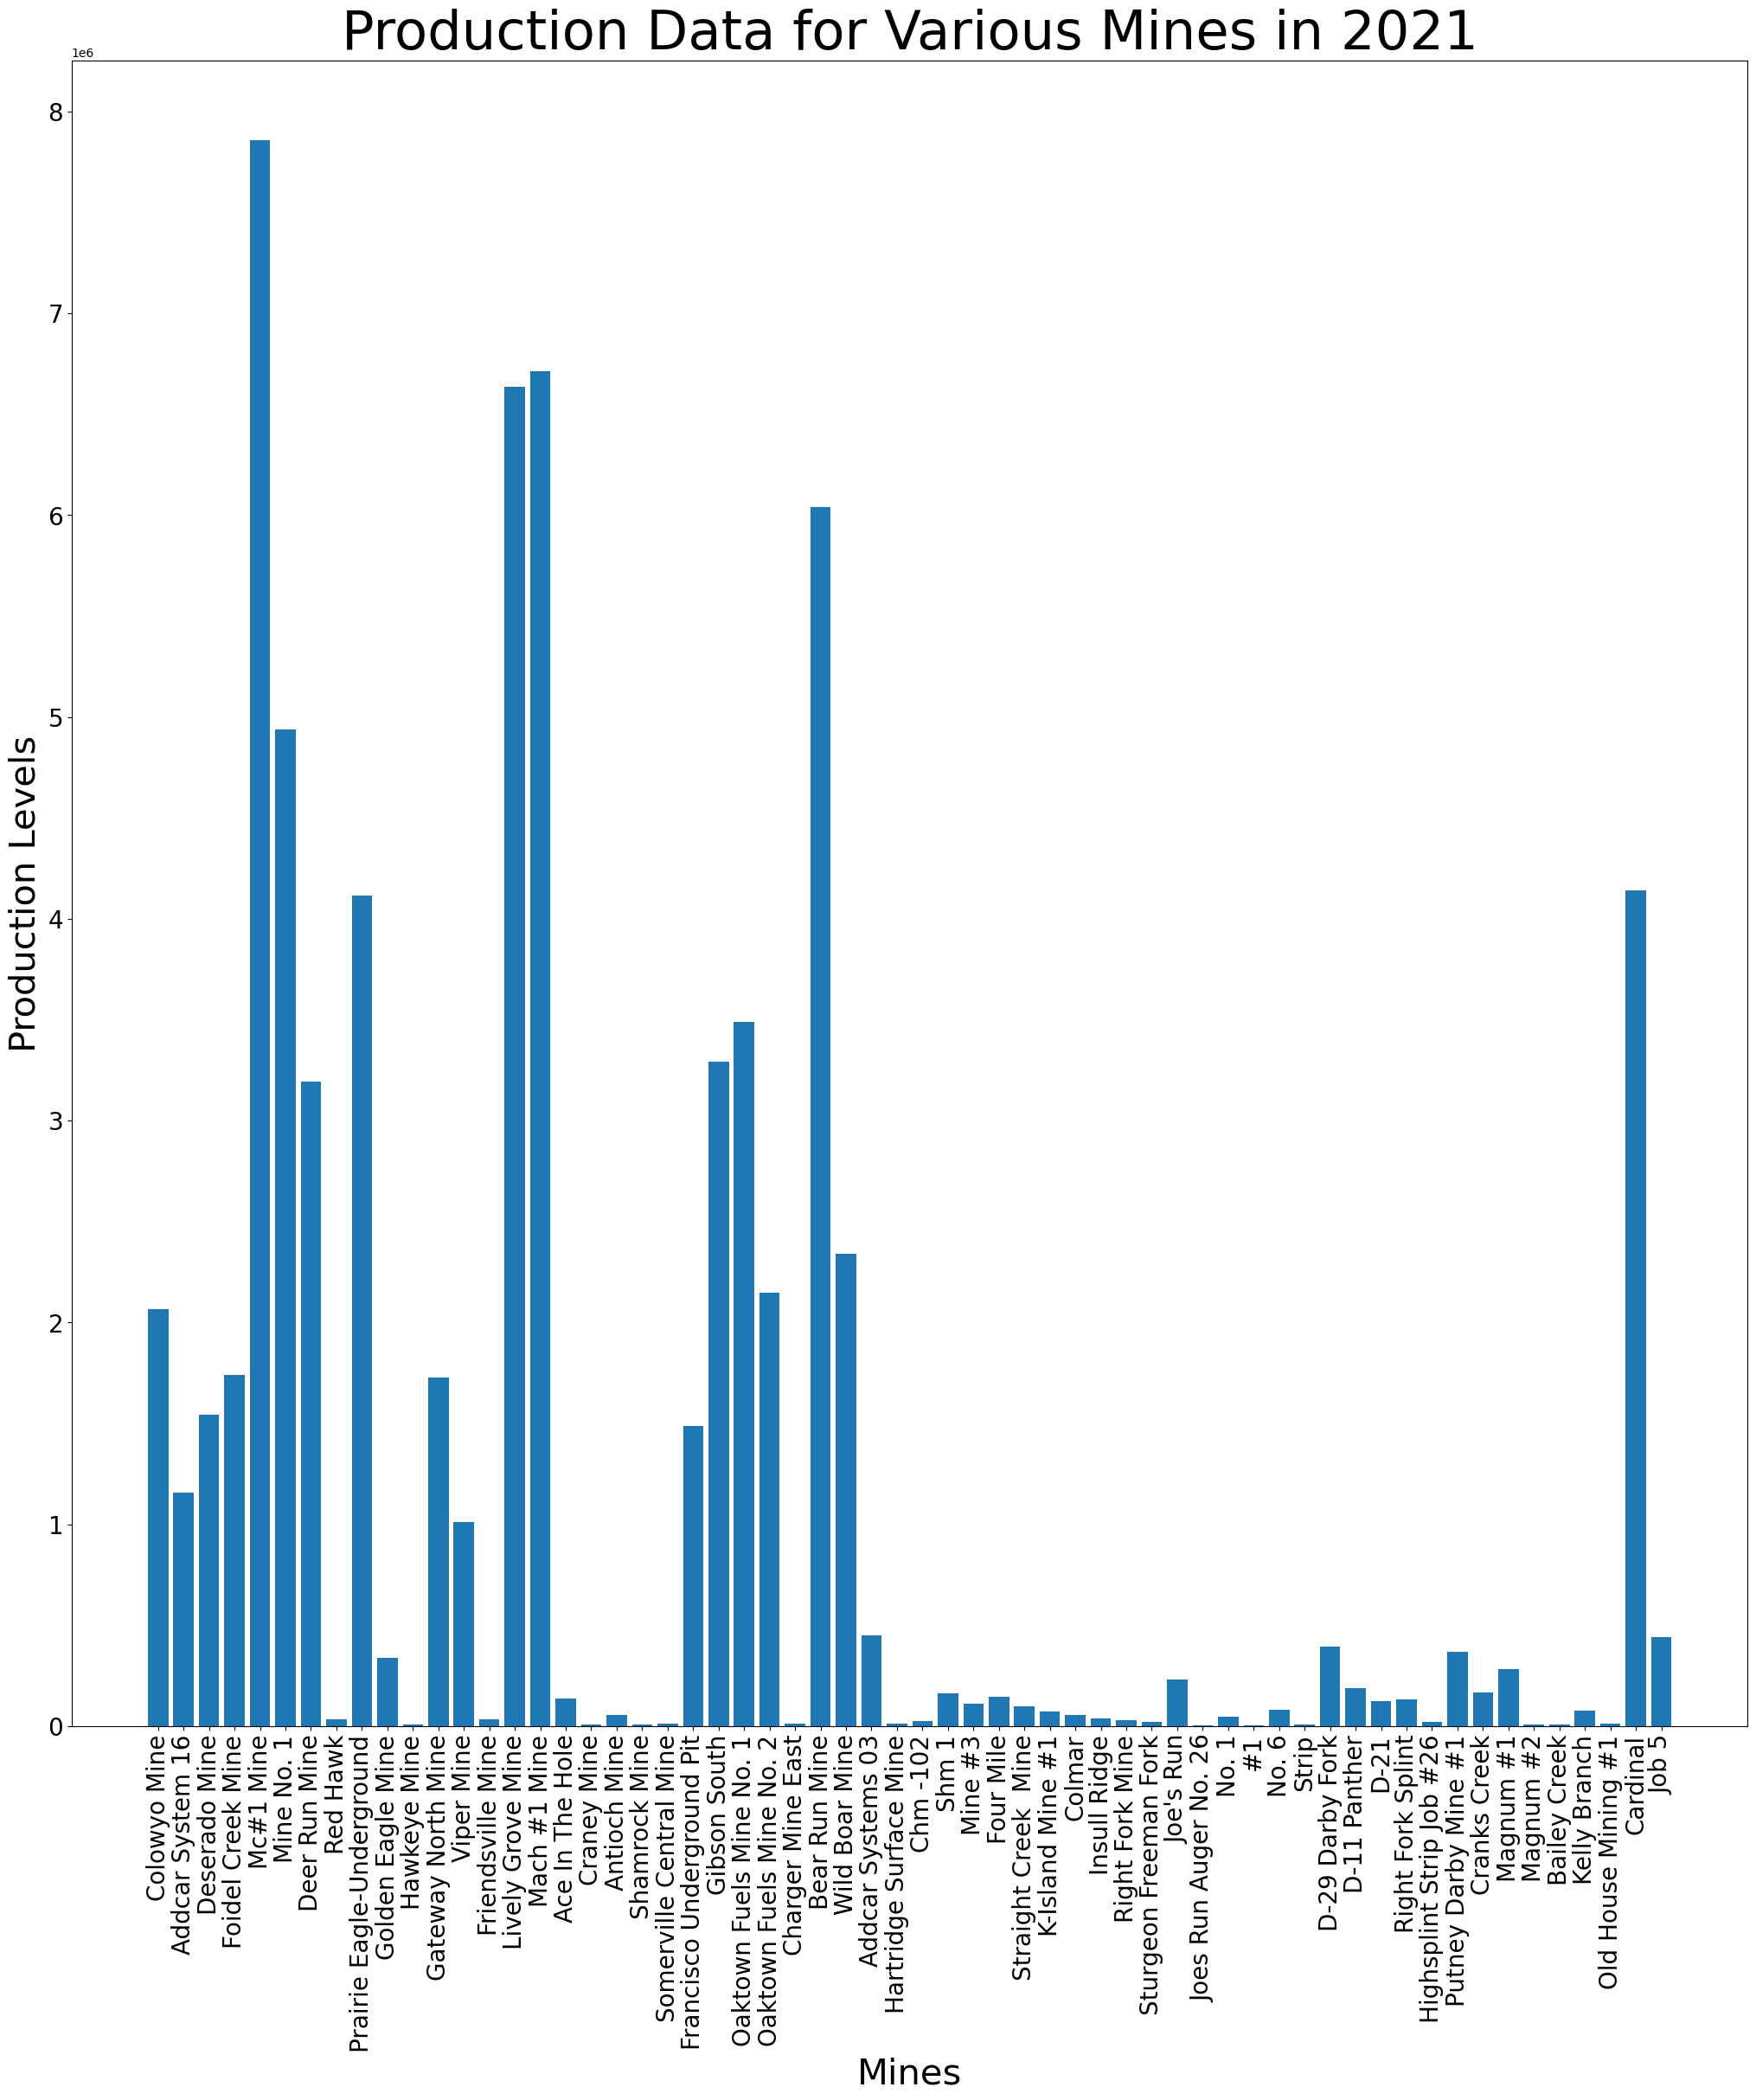

<Figure size 640x480 with 0 Axes>

In [8]:
# Creating a bar chart of production levels for each mine
selected_data = data_coal.iloc[25:85]
plt.figure(figsize = (25,25))
plt.bar(selected_data['Mine Name'], selected_data['Production (short tons)'])
plt.title('Production Data for Various Mines in 2021', fontdict = {'size' : 45})
plt.xticks(rotation=90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Mines', fontdict = {'size' : 30},)
plt.ylabel('Production Levels', fontdict = {'size' : 30})
plt.show()
plt.savefig("Bar Plot.png")


In [9]:
#data_coal = data_coal.drop(['Mine Name', 'Mine State'], axis=1)
data_coal.head(10)

,Year,Mine Name,Mine State,Mine Type,Production (short tons),Average Employees,Labor Hours
0,2021,John Poe Mine,Alabama,Surface,6487,2,820
1,2021,Flat Top Mine,Alabama,Surface,203190,42,117312
2,2021,Oak Grove Mine,Alabama,Underground,2020277,461,1100028
3,2021,No 7 Mine,Alabama,Underground,4793699,514,1502426
4,2021,Narley Mine,Alabama,Surface,130,3,2757
5,2021,Maxine-Pratt Mine,Alabama,Underground,96907,27,53479
6,2021,Black Warrior Mine No 1,Alabama,Surface,156423,50,123270
7,2021,Weller Mine,Alabama,Surface,11795,7,13228
8,2021,Shannon Mine No. 3,Alabama,Surface,261572,46,85097
9,2021,Sloan Mtn. No. 3,Alabama,Surface,169982,44,114893


In [10]:
data_coal.describe()

,Year,Production (short tons),Average Employees,Labor Hours
count,312.0,3.120000e+02,312.000000,3.120000e+02
mean,2021.0,7.024051e+05,55.855769,1.219417e+05
std,0.0,1.886656e+06,109.136018,2.466141e+05
min,2021.0,1.700000e+01,1.000000,2.000000e+00
25%,2021.0,1.125550e+04,5.000000,5.861000e+03
50%,2021.0,7.105550e+04,14.000000,2.932450e+04
75%,2021.0,2.599268e+05,42.000000,9.724150e+04
max,2021.0,1.309574e+07,716.000000,1.721009e+06


In [11]:
data_coal.shape

(312, 7)

## Normalising Data

In [12]:
upper_lim1 =  data_coal['Production (short tons)'].mean() +  data_coal['Production (short tons)'].std() * 3
lower_lim1 =  data_coal['Production (short tons)'].mean() -  data_coal['Production (short tons)'].std() * 3
upper_lim2 =  data_coal['Labor Hours'].mean() + data_coal['Labor Hours'].std() * 3
lower_lim2 =  data_coal['Labor Hours'].mean() - data_coal['Labor Hours'].std() * 3
upper_lim3 =  data_coal['Average Employees'].mean() + data_coal['Average Employees'].std() * 3
lower_lim3 =  data_coal['Average Employees'].mean() - data_coal['Average Employees'].std() * 3

In [13]:

data_coal =   data_coal[((data_coal['Production (short tons)']< upper_lim1) & (data_coal['Production (short tons)'] > lower_lim1) & 
                        (data_coal['Labor Hours']< upper_lim2) & (data_coal['Labor Hours'] > lower_lim2) &
                        (data_coal['Average Employees']< upper_lim3) & (data_coal['Average Employees'] > lower_lim3))]
data_coal = data_coal.reset_index(drop=True)
data_coal.describe()

,Year,Production (short tons),Average Employees,Labor Hours
count,296.0,2.960000e+02,296.000000,296.000000
mean,2021.0,3.353010e+05,35.750000,76970.391892
std,0.0,8.069649e+05,59.587039,130936.592516
min,2021.0,1.700000e+01,1.000000,2.000000
25%,2021.0,1.021600e+04,4.000000,5383.500000
50%,2021.0,5.796700e+04,13.000000,26176.500000
75%,2021.0,1.875288e+05,34.000000,75859.000000
max,2021.0,5.299867e+06,368.000000,731822.000000


In [14]:
data_coal.dtypes

Year                        int64
Mine Name                  object
Mine State                 object
Mine Type                  object
Production (short tons)     int64
Average Employees           int64
Labor Hours                 int64
dtype: object

## Feature Engineering

In [15]:
data_coal["F"] = data_coal["Labor Hours"] * data_coal["Average Employees"]

In [16]:
data_coal

,Year,Mine Name,Mine State,Mine Type,Production (short tons),Average Employees,Labor Hours,F
0,2021,John Poe Mine,Alabama,Surface,6487,2,820,1640
1,2021,Flat Top Mine,Alabama,Surface,203190,42,117312,4927104
2,2021,Narley Mine,Alabama,Surface,130,3,2757,8271
3,2021,Maxine-Pratt Mine,Alabama,Underground,96907,27,53479,1443933
4,2021,Black Warrior Mine No 1,Alabama,Surface,156423,50,123270,6163500
...,...,...,...,...,...,...,...,...
291,2021,Beachley Strip,Pennsylvania (Bituminous),Surface,17841,2,2903,5806
292,2021,Langley Mine,Pennsylvania (Bituminous),Surface,46602,9,17819,160371
293,2021,"Adc, Inc Pit 008",Pennsylvania (Bituminous),Surface,3967,2,2478,4956
294,2021,Rustic Ridge #1 Mine,Pennsylvania (Bituminous),Underground,441806,93,210971,19620303


In [17]:
df1 = data_coal[['Year', 'Mine Type']]
df1

,Year,Mine Type
0,2021,Surface
1,2021,Surface
2,2021,Surface
3,2021,Underground
4,2021,Surface
...,...,...
291,2021,Surface
292,2021,Surface
293,2021,Surface
294,2021,Underground


# SCALING

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# data = data_coal.copy(deep = True)
# min_max_scaler = MinMaxScaler()
scaler = StandardScaler()
# data.iloc[:, [4, 5, 6]] = min_max_scaler.fit_transform(data.iloc[:, [4, 5, 6]])
# data.head()
x = data_coal.iloc[:, 5:]
x.head()
x = scaler.fit_transform(x)

z = data_coal['Production (short tons)'].values
z = scaler.fit_transform(z.reshape(-1,1))

In [19]:
df2 = pd.DataFrame(x, columns=['Average Employees','Labor Hours', 'F'])
df3 = pd.DataFrame(z, columns=['Production (short tons)'])
scaled_df = pd.concat([df1, df2, df3], axis=1)
scaled_df

,Year,Mine Type,Average Employees,Labor Hours,F,Production (short tons)
0,2021,Surface,-0.567358,-0.582567,-0.321523,-0.408160
1,2021,Surface,0.105066,0.308622,-0.169724,-0.163991
2,2021,Surface,-0.550547,-0.567749,-0.321319,-0.416051
3,2021,Underground,-0.147093,-0.179714,-0.277073,-0.295921
4,2021,Surface,0.239551,0.354202,-0.131619,-0.222043
...,...,...,...,...,...,...
291,2021,Surface,-0.567358,-0.566632,-0.321395,-0.394066
292,2021,Surface,-0.449683,-0.452521,-0.316631,-0.358365
293,2021,Surface,-0.567358,-0.569883,-0.321421,-0.411288
294,2021,Underground,0.962406,1.025134,0.283108,0.132206


In [20]:
scaled_df.isnull().sum()

Year                       0
Mine Type                  0
Average Employees          0
Labor Hours                0
F                          0
Production (short tons)    0
dtype: int64

In [21]:
scaled_df.describe()

,Year,Average Employees,Labor Hours,F,Production (short tons)
count,296.0,296.000000,2.960000e+02,2.960000e+02,296.000000
mean,2021.0,0.000000,-2.400482e-17,-1.200241e-17,0.000000
std,0.0,1.001693,1.001693e+00,1.001693e+00,1.001693
min,2021.0,-0.584168,-5.888250e-01,-3.215734e-01,-0.416191
25%,2021.0,-0.533736,-5.476553e-01,-3.208408e-01,-0.403531
50%,2021.0,-0.382441,-3.885843e-01,-3.105687e-01,-0.344257
75%,2021.0,-0.029419,-8.502390e-03,-2.423828e-01,-0.183431
max,2021.0,5.585320,5.009758e+00,7.502175e+00,6.162565


## LabelEncoding the Mine Type Column

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
scaled_df['Mine Type'] = label_encoder.fit_transform(scaled_df['Mine Type'])
scaled_df.head()

,Year,Mine Type,Average Employees,Labor Hours,F,Production (short tons)
0,2021,0,-0.567358,-0.582567,-0.321523,-0.408160
1,2021,0,0.105066,0.308622,-0.169724,-0.163991
2,2021,0,-0.550547,-0.567749,-0.321319,-0.416051
3,2021,1,-0.147093,-0.179714,-0.277073,-0.295921
4,2021,0,0.239551,0.354202,-0.131619,-0.222043


In [23]:
# poly = PolynomialFeatures(interaction_only = True)
# xx = poly.fit_transform(X)
# xx.shape, X.shape
# feng = []
# for i in range(scaled_df.shape[0]):
#     feng.append(scaled_df['Average Employees'][i]*scaled_df['Labor Hours'][i])
# scaled_df['feat_eng'] = feng

# Plotting Heatmap to see the correlation between different parameters

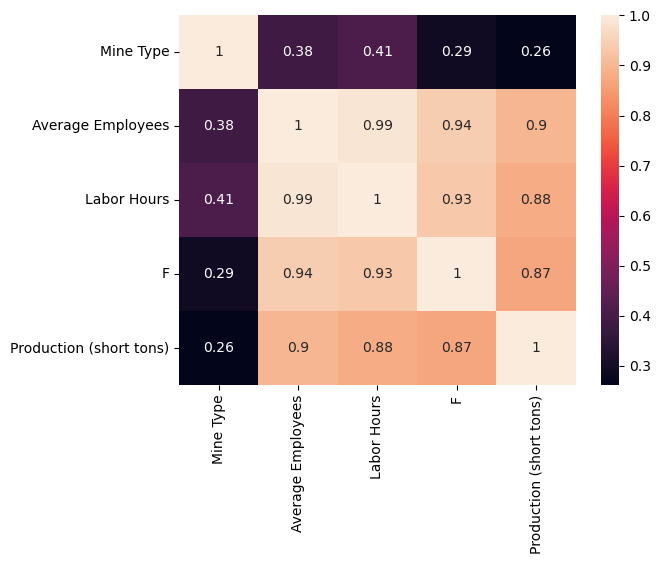

In [24]:
import seaborn as sns

g = sns.heatmap(scaled_df.drop('Year', axis = 'columns').corr(), annot=True)

fig = g.get_figure()
fig.savefig("HeatMap.png")
plt.show(g)


# PairPlot

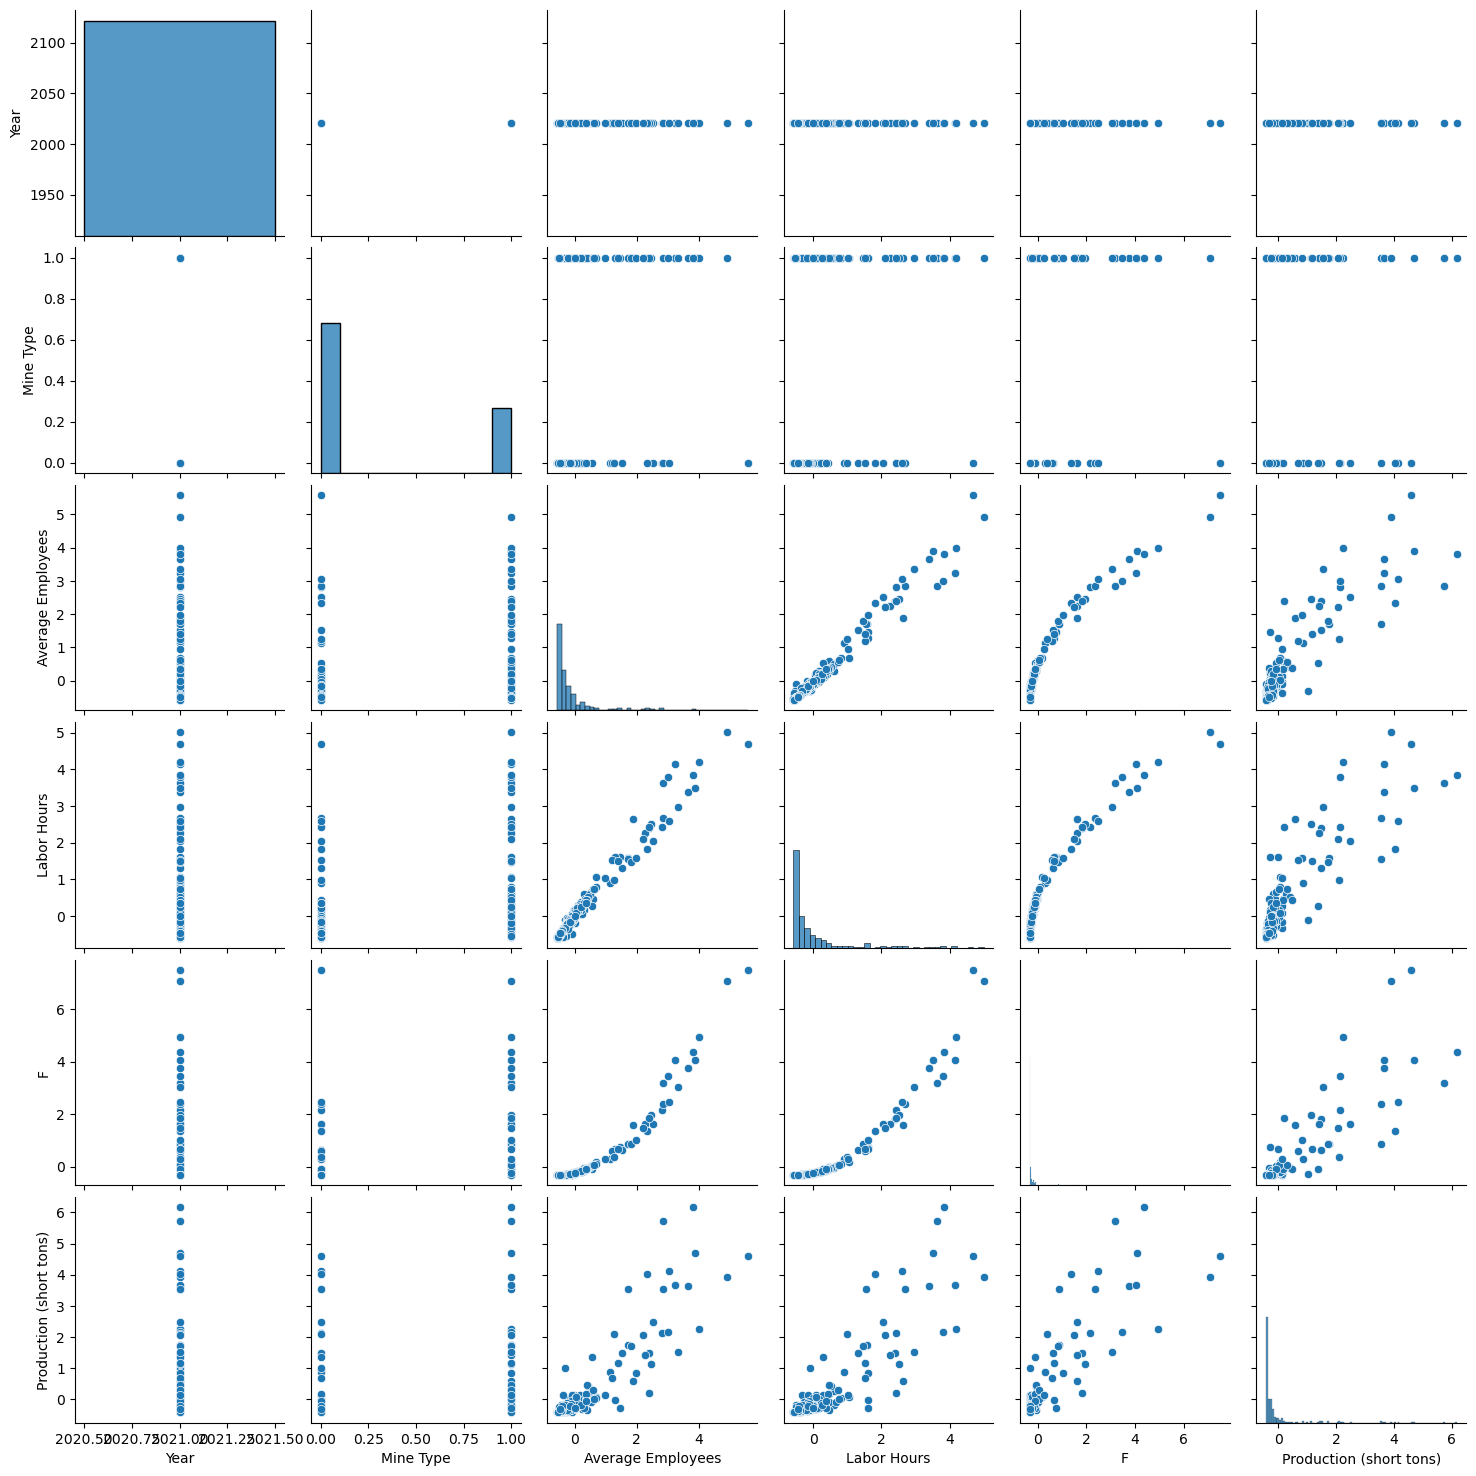

In [25]:
pp = sns.pairplot(scaled_df)
pp.figure.savefig("Pair_Plot.png")


In [26]:
input_params = ['Average Employees', 'Labor Hours', 'Mine Type', 'F']

## Splitting Data into test and train data

In [27]:
X = scaled_df[input_params]
# X = poly.fit_transform(X)
y = scaled_df['Production (short tons)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [28]:
X_test.head()

,Average Employees,Labor Hours,Mine Type,F
33,1.802936,1.461946,1,0.859845
289,-0.483305,-0.462918,0,-0.318023
269,-0.584168,-0.572193,0,-0.321506
4,0.239551,0.354202,0,-0.131619
249,-0.449683,-0.473506,0,-0.317392


In [29]:
# test_indices = X_test.index

In [30]:
# X_original = data_coal.iloc[test_indices][['Average Employees', 'Labor Hours', 'Mine Type', 'F']]
# # X_original = X_original['Average Employees', 'Labor Hours', 'F']
X_train['Mine Type'] = label_encoder.fit_transform(X_train['Mine Type'])
X_test['Mine Type'] = label_encoder.fit_transform(X_test['Mine Type'])
X_train.head()

,Average Employees,Labor Hours,Mine Type,F
76,-0.416062,-0.535442,0,-0.319207
100,-0.365630,-0.367428,0,-0.309086
159,-0.466494,-0.510089,0,-0.319035
150,-0.432873,-0.466460,0,-0.316643
156,-0.533736,-0.529628,0,-0.320619


# Using Multivariate Linear Regression Model

In [31]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)


# Matching predicted values and test values

In [33]:
y_test

33     1.729877
289   -0.369490
269   -0.385867
4     -0.222043
249   -0.362862
285    0.025613
161    1.364783
101   -0.364572
179   -0.086626
277   -0.258072
214   -0.397355
0     -0.408160
153   -0.404146
30     4.690629
295   -0.304775
13    -0.206485
3     -0.295921
148   -0.140563
79    -0.311894
254   -0.266484
38    -0.350426
180   -0.060277
218   -0.318151
205   -0.395219
118   -0.358364
190   -0.382634
238   -0.342018
89    -0.406446
45    -0.400674
157    0.049754
177   -0.398225
246   -0.415545
145   -0.404606
225    2.056555
113   -0.318572
162   -0.291574
125   -0.205520
47     0.140419
1     -0.163991
216   -0.394462
61    -0.358456
279   -0.413998
102   -0.404022
265   -0.163742
83    -0.093527
111   -0.322131
229    0.074554
96    -0.192201
208   -0.256586
141   -0.297223
280   -0.412405
25     1.496917
8     -0.401813
69    -0.391986
46     2.488715
228   -0.270438
80    -0.351218
237   -0.405260
164    4.591925
166    0.130850
Name: Production (short tons), dtype: fl

In [34]:
y_pred

array([ 1.43193989e+00, -3.65885959e-01, -4.40107426e-01,  1.96482205e-01,
       -3.33469237e-01,  3.05918004e-01,  4.94098355e-01, -2.05831972e-01,
       -3.51988085e-01,  2.44126103e-01, -3.81513117e-01, -4.23131010e-01,
       -4.38423289e-01,  3.70554760e+00, -3.66652243e-01,  1.59748297e-01,
       -3.20151022e-01, -2.37174625e-01, -2.03449255e-01, -1.96110068e-01,
       -2.84082551e-01, -3.10981164e-01, -5.84199568e-03, -3.14228362e-01,
       -5.00936388e-01, -4.16040480e-01, -8.98950097e-02, -3.80086644e-01,
       -4.14464572e-01,  3.50517508e-01, -2.83601573e-01, -6.44740604e-01,
       -2.74464583e-01,  1.83276255e+00, -5.21473551e-01, -3.63439464e-01,
       -4.26014984e-01, -2.94811431e-01,  7.34418114e-02, -3.57178632e-01,
       -4.77524261e-01, -4.38762640e-01, -3.65057042e-01, -2.32928573e-01,
        9.38533493e-02,  1.06409222e-01, -1.99788236e-01, -3.28089806e-01,
       -4.36654389e-01, -2.91228850e-01, -4.07776633e-01,  2.02547574e+00,
       -4.27346594e-01, -

In [35]:
y_test.to_numpy()

array([ 1.72987698, -0.36948959, -0.38586743, -0.22204308, -0.36286224,
        0.02561314,  1.36478292, -0.36457152, -0.0866261 , -0.2580721 ,
       -0.39735451, -0.40816012, -0.40414572,  4.69062944, -0.30477514,
       -0.2064845 , -0.29592088, -0.1405635 , -0.31189405, -0.26648445,
       -0.35042555, -0.06027682, -0.3181515 , -0.39521946, -0.35836373,
       -0.38263382, -0.34201816, -0.40644587, -0.40067378,  0.04975413,
       -0.39822467, -0.41554467, -0.40460625,  2.05655498, -0.3185723 ,
       -0.29157381, -0.20552   ,  0.14041941, -0.16399074, -0.39446226,
       -0.35845559, -0.413998  , -0.40402159, -0.16374248, -0.09352654,
       -0.32213114,  0.07455426, -0.19220075, -0.25658625, -0.29722301,
       -0.4124054 ,  1.49691663, -0.4018133 , -0.39198585,  2.48871454,
       -0.27043803, -0.35121751, -0.40526042,  4.59192544,  0.13085015])

## Regressor Score

In [36]:
print(regressor_train_score)

0.965434578231


In [37]:

regressor.score(X_test, y_test)

0.9046842260401798

## Predicting Test Data

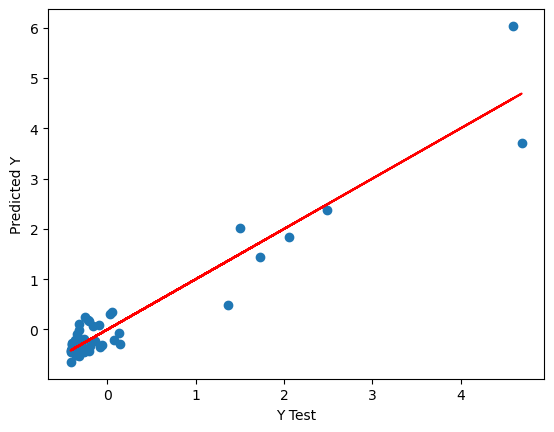

In [38]:
# Predicting Test Data

plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig("Predicted Y_Y Test.png")

# Predicting values based on certain input

In [39]:
regressor.predict([[5000, 20000, 0, 100000000]])

array([22351463.1511995])

# Evaluating Data

In [40]:
X_test

,Average Employees,Labor Hours,Mine Type,F
33,1.802936,1.461946,1,0.859845
289,-0.483305,-0.462918,0,-0.318023
269,-0.584168,-0.572193,0,-0.321506
4,0.239551,0.354202,0,-0.131619
249,-0.449683,-0.473506,0,-0.317392
285,0.626195,0.748035,1,0.071579
161,0.542142,0.281051,0,-0.083275
101,-0.298388,-0.402389,0,-0.308053
179,-0.197524,-0.284079,1,-0.292108
277,0.289983,0.359993,0,-0.118986


In [41]:
# X_test.index
# indices = X_test.index

In [42]:
#orig_data = scaler.inverse_transform(y_pred.reshape(-1,1))
# orig_data

# Coefficients and Intercept

In [43]:
coeffecients = pd.DataFrame(regressor.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Average Employees,0.907769
Labor Hours,-0.165801
Mine Type,-0.221665
F,0.223502


In [50]:
print("y-intercept:", regressor.intercept_)

y-intercept: 0.06716957563058285


In [44]:
# # plt.bar(r, Women, color = 'b',
# #         width = width, edgecolor = 'black',
# #         label='Women')
# # plt.bar(r + width, Men, color = 'g',
# #         width = width, edgecolor = 'black',
# #         label='Men')

# selected_data2 = data_coal.iloc[indices]
# plt.figure(figsize = (25,25))
# #plt.bar(selected_data2['Mine Name'], selected_data2['Production (short tons)'], color = 'green')
# #plt.bar(indices, selected_data2['Production (short tons)'], color = 'green', width = 3)
# plt.bar(selected_data2['Mine Name'], y_pred, color = 'orange')
# plt.title('Production Data for Various Mines in 2021', fontdict = {'size' : 45})
# plt.xticks(rotation=90, fontsize = 20)
# plt.xlabel('Mines', fontdict = {'size' : 30},)
# plt.ylabel('Production Levels', fontdict = {'size' : 30})
# plt.show()

# Checking for errors

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2031256199052605
MSE: 0.10427847211935815
RMSE: 0.3229217739938856


# Residual Plot

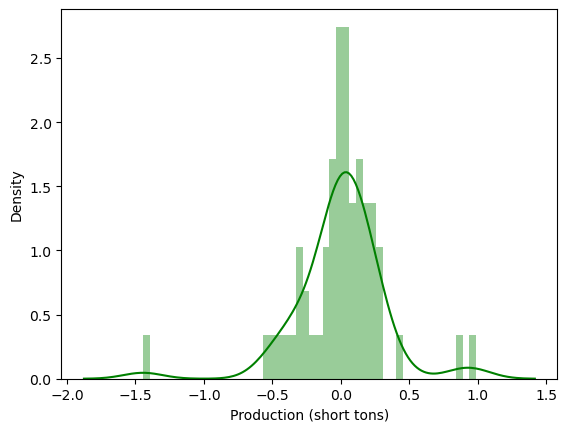

In [46]:
# Residuals

rp = sns.distplot((y_test-y_pred),bins=50, color ='green');

fig = rp.get_figure()
fig.savefig("Residual Plot.png")
plt.show(rp)

# Using Random Forest Regression 

In [47]:
from sklearn.ensemble import RandomForestRegressor
data2 = pd.read_csv('COAL_PRODUCTION_2021_filtered1.csv')

data2['Labor Hours'] = data2['Labor Hours'].str.replace(',', '')
data2['Production (short tons)'] = data2['Production (short tons)'].str.replace(',', '')
data2 = data2.astype({'Labor Hours': 'int64'})
data2 = data2.astype({'Production (short tons)': 'int64'})

encoder = LabelEncoder()
data2['Mine Type'] = encoder.fit_transform(data2['Mine Type'])

scaler = StandardScaler()
data2[['Average Employees', 'Labor Hours']] = scaler.fit_transform(data2[['Average Employees', 'Labor Hours']])

XX = data2[['Average Employees', 'Labor Hours', 'Mine Type']]
yy = data2['Production (short tons)']
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=10, min_samples_split=5, random_state=42)
rfr.fit(XX_train, yy_train)

RandomForestRegressor(min_samples_split=5, n_estimators=10, random_state=42)

# Using Random Forest Regression

In [48]:
yy_pred = rfr.predict(XX_train)
r2 = r2_score(yy_train, yy_pred)
print(f"On training dataset: {r2:.2f}")

yy_pred = rfr.predict(XX_test)
r2 = r2_score(yy_test, yy_pred)
print(f"On test dataset: {r2:.2f}")

On training dataset: 0.91
On test dataset: 0.83


Text(0, 0.5, 'Predicted Y')

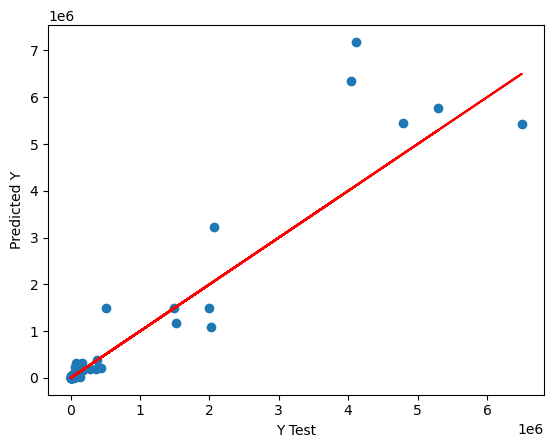

In [49]:
plt.scatter(yy_test,yy_pred)
plt.plot(yy_test, yy_test, color="red")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')